# Machine Learning Powered Predictive Inventory-Optimization for Retail #


This notebook outlines the development and analysis of a predictive inventory management system for retail businesses. The system leverages data and machine learning to optimize inventory levels, reduce waste, and improve operational efficiency.

## 1. Import Necessary Libraries ##

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Preprocess the Dataset ##

In [74]:
# Load the dataset
file_path = "supermarket retail.csv"
data = pd.read_csv(file_path)

In [75]:
data.head

<bound method NDFrame.head of      Order ID Customer Name           Category      Sub Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli  

In [76]:
# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

In [77]:
# Drop unnecessary columns
data.drop(['Order ID', 'Customer Name'], axis=1, inplace=True)

# Handle missing values
data.dropna(inplace=True)

In [78]:
# Feature Engineering: Extract date components
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day

# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['Region', 'Category', 'Sub Category', 'State'], drop_first=True)

# Preview preprocessed data
print(data_encoded.head())

          City Order Date  Sales  Discount  Profit  Year  Month  Day  \
0      Vellore 2017-11-08   1254      0.12  401.28  2017     11    8   
1  Krishnagiri 2017-11-08    749      0.18  149.80  2017     11    8   
2   Perambalur 2017-06-12   2360      0.21  165.20  2017      6   12   
3   Dharmapuri 2016-10-11    896      0.25   89.60  2016     10   11   
4         Ooty 2016-10-11   2355      0.26  918.45  2016     10   11   

   Region_East  Region_North  ...  Sub Category_Health Drinks  \
0        False          True  ...                       False   
1        False         False  ...                        True   
2        False         False  ...                       False   
3        False         False  ...                       False   
4        False         False  ...                       False   

   Sub Category_Masalas  Sub Category_Mutton  Sub Category_Noodles  \
0                  True                False                 False   
1                 False             

## 3. Exploratory Data Analysis ##

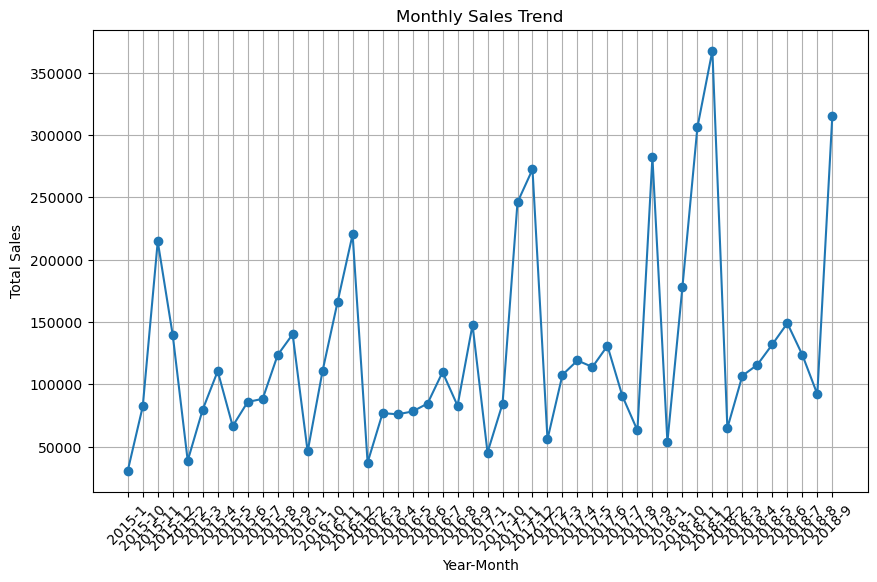

In [79]:
# Overall sales trends over time
data['Year-Month'] = data['Year'].astype(str) + '-' + data['Month'].astype(str)
monthly_sales = data.groupby('Year-Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10884\2644686796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sales', data=monthly_demand, palette="rocket")


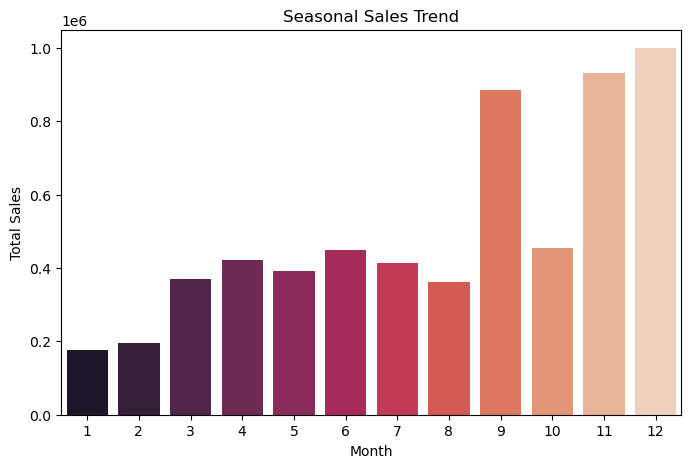

In [80]:
# Sales by month
monthly_demand = data.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='Sales', data=monthly_demand, palette="rocket")
plt.title("Seasonal Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

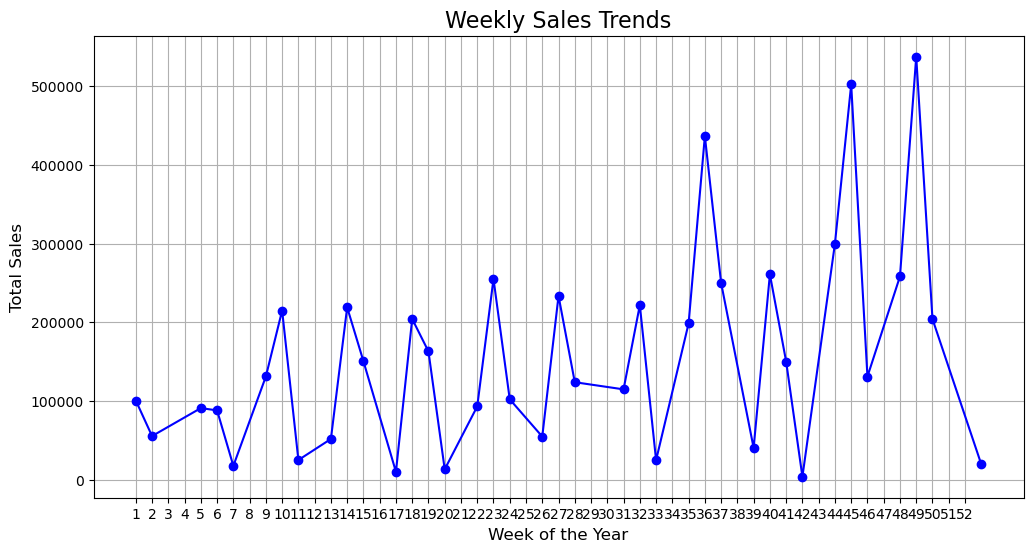

In [81]:
#Weekly Sales Trends
data['Week'] = data['Order Date'].dt.isocalendar().week  # Extract the week number
weekly_sales = data.groupby('Week')['Sales'].sum()


plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Weekly Sales Trends', fontsize=16)
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.xticks(range(1, 53)) 
plt.show()

In [82]:
# Create a 'Date' column from 'Year', 'Month', and 'Day'
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Extract the day name
data['Day Name'] = data['Date'].dt.day_name()

# Group by day name to calculate total sales
weekday_sales = data.groupby('Day Name')['Sales'].sum().reset_index()

# Sort the day names for better visualization
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['Day Name'] = pd.Categorical(weekday_sales['Day Name'], categories=weekday_order, ordered=True)
weekday_sales = weekday_sales.sort_values('Day Name')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10884\306825058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day Name', y='Sales', data=weekday_sales, palette="magma")


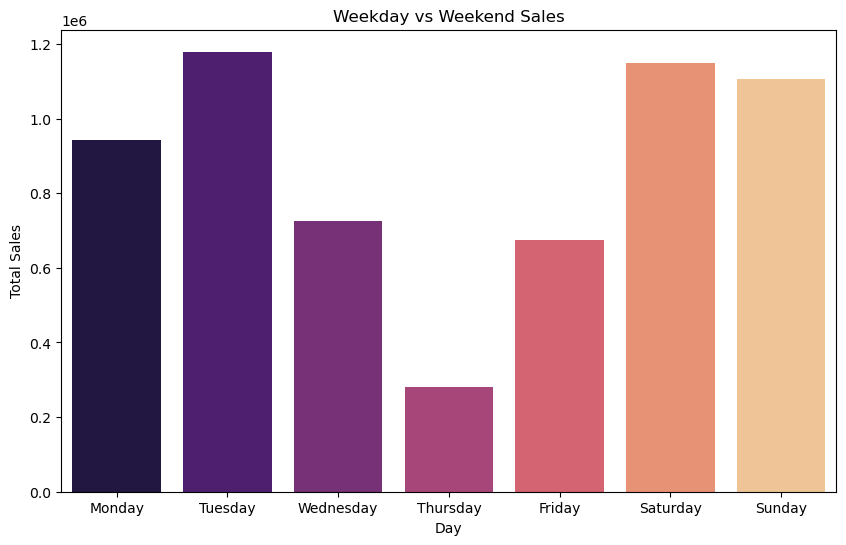

In [83]:
# Plotting the sales by weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Day Name', y='Sales', data=weekday_sales, palette="magma")
plt.title("Weekday vs Weekend Sales")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10884\826672727.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sub Category', x='Sales', data=product_sales, palette="magma")


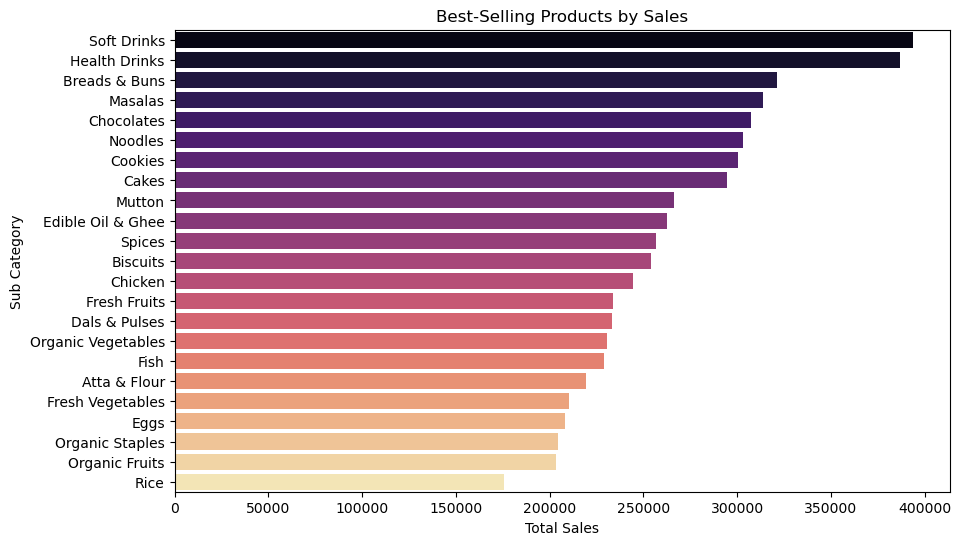

In [84]:
# Most sold product categories
product_sales = data.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(y='Sub Category', x='Sales', data=product_sales, palette="magma")
plt.title("Best-Selling Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Sub Category")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10884\3094695758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Sub Category', x='Sales', data=least_sold_products, palette="cividis")


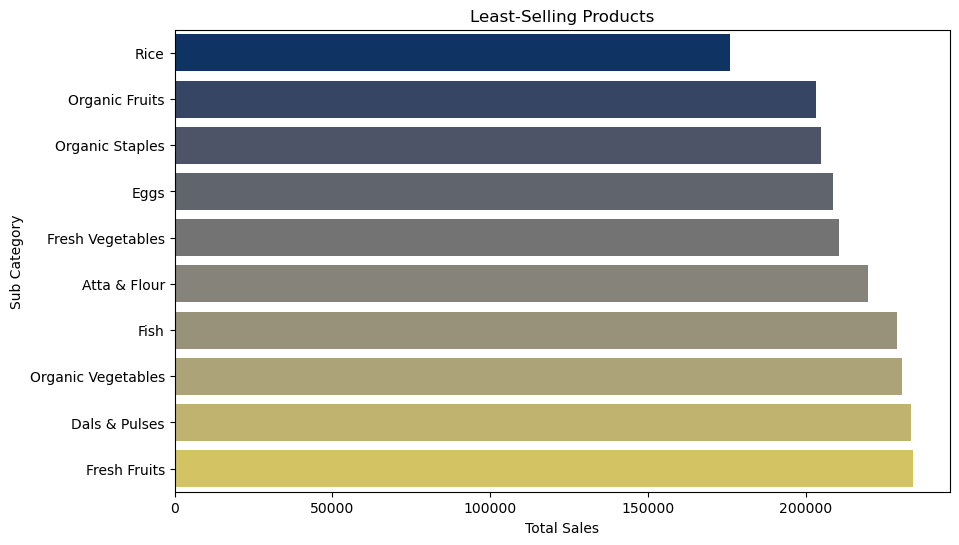

In [85]:
# Top 10 Products with lowest sales
least_sold_products = data.groupby('Sub Category')['Sales'].sum().sort_values().head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(y='Sub Category', x='Sales', data=least_sold_products, palette="cividis")
plt.title("Least-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Sub Category")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10884\897359352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


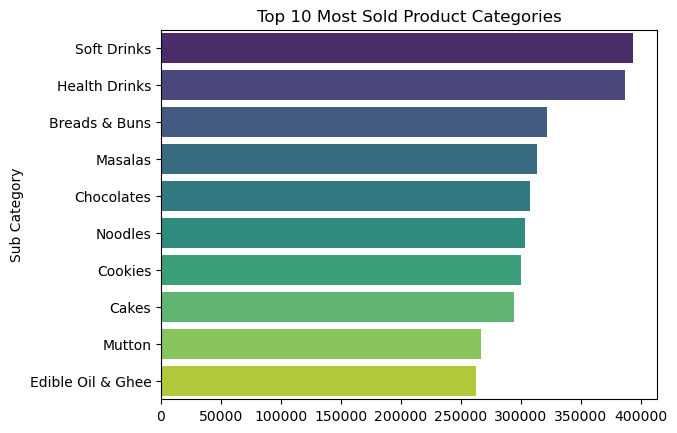

In [86]:
# Top 10 best selling products
top_products = data.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Most Sold Product Categories")
plt.show()

In [87]:
# Check if required columns are in the dataset
if 'Region' in data.columns and 'Sub Category' in data.columns and 'Sales' in data.columns:
    
    # Group by Region and Sub Category to calculate total sales
    region_product_sales = data.groupby(['Region', 'Sub Category'])['Sales'].sum().reset_index()
    
    # Find the top-selling product in each region
    top_products_per_region = region_product_sales.loc[
        region_product_sales.groupby('Region')['Sales'].idxmax()
    ]
    
    print("\nTop Selling Products in Each Region:")
    print(top_products_per_region)

    
else:
    print("Error: Required columns ('Region', 'Sub Category', 'Sales') are missing in the dataset.")



Top Selling Products in Each Region:
     Region   Sub Category   Sales
13  Central  Health Drinks  103469
36     East  Health Drinks  116700
46    North        Masalas    1254
68    South    Soft Drinks   61217
91     West    Soft Drinks  132979


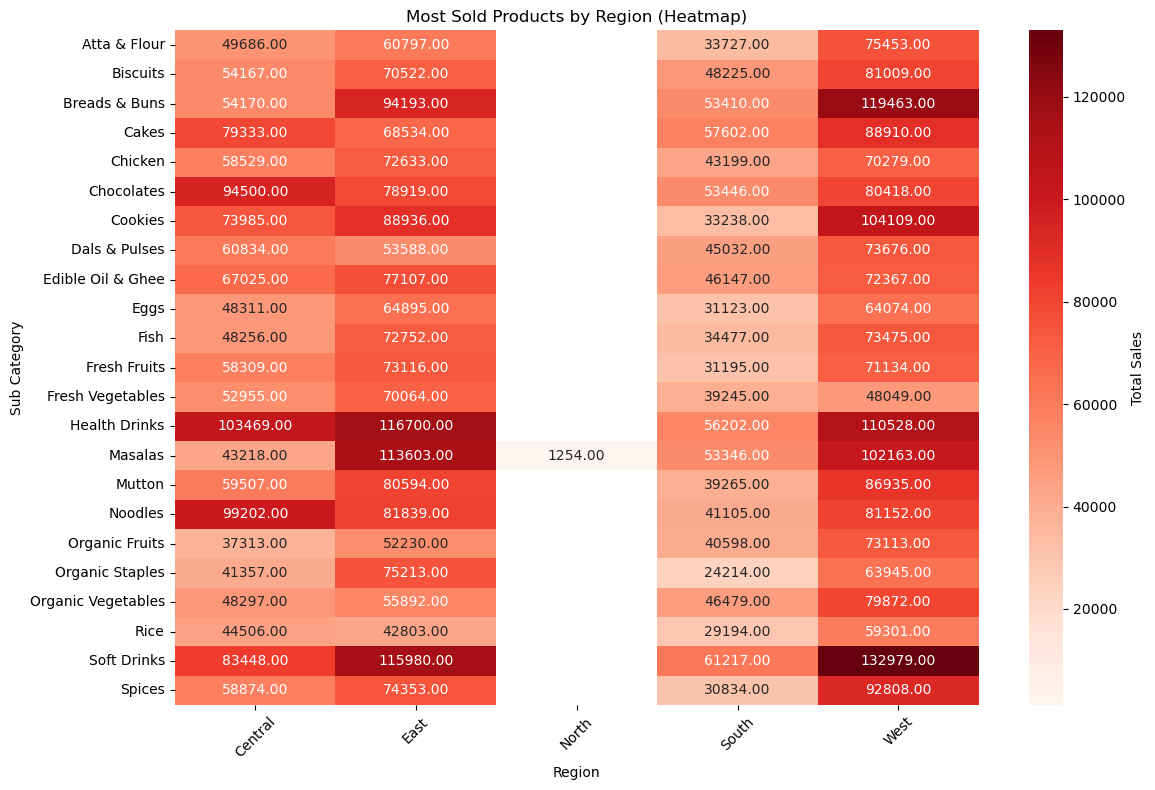

In [88]:
# Create a pivot table for the heatmap
sales_pivot = region_product_sales.pivot(index="Sub Category", columns="Region", values="Sales")

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Total Sales'})
plt.title("Most Sold Products by Region (Heatmap)")
plt.ylabel("Sub Category")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


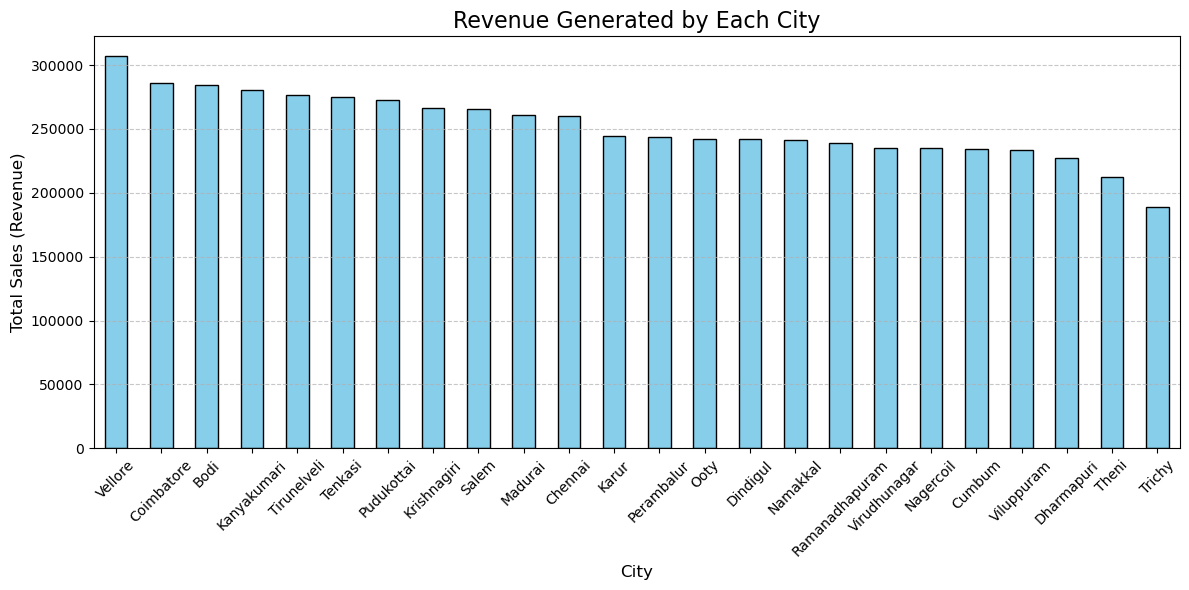

In [89]:

#Group data by City and calculate total sales
city_revenue = data.groupby('City')['Sales'].sum().sort_values(ascending=False)

#Plot a bar chart
plt.figure(figsize=(12, 6))
city_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

#Add labels and title
plt.title("Revenue Generated by Each City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales (Revenue)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10884\339260846.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Inventory Turnover', y='Sub Category', data=inventory_turnover, palette="viridis")


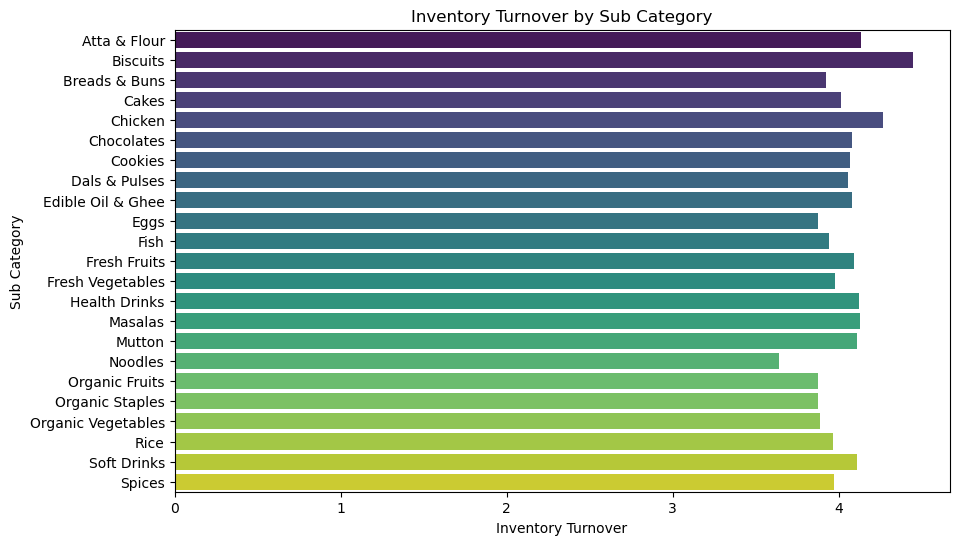

In [90]:
# Inventory turnover by product category
inventory_turnover = data.groupby('Sub Category')['Sales'].sum() / data.groupby('Sub Category')['Profit'].sum()
inventory_turnover = inventory_turnover.reset_index()
inventory_turnover.columns = ['Sub Category', 'Inventory Turnover']

plt.figure(figsize=(10, 6))
sns.barplot(x='Inventory Turnover', y='Sub Category', data=inventory_turnover, palette="viridis")
plt.title("Inventory Turnover by Sub Category")
plt.xlabel("Inventory Turnover")
plt.ylabel("Sub Category")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_10884\1750156424.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', hue='Sub Category', data=region_product_sales, ci=None)


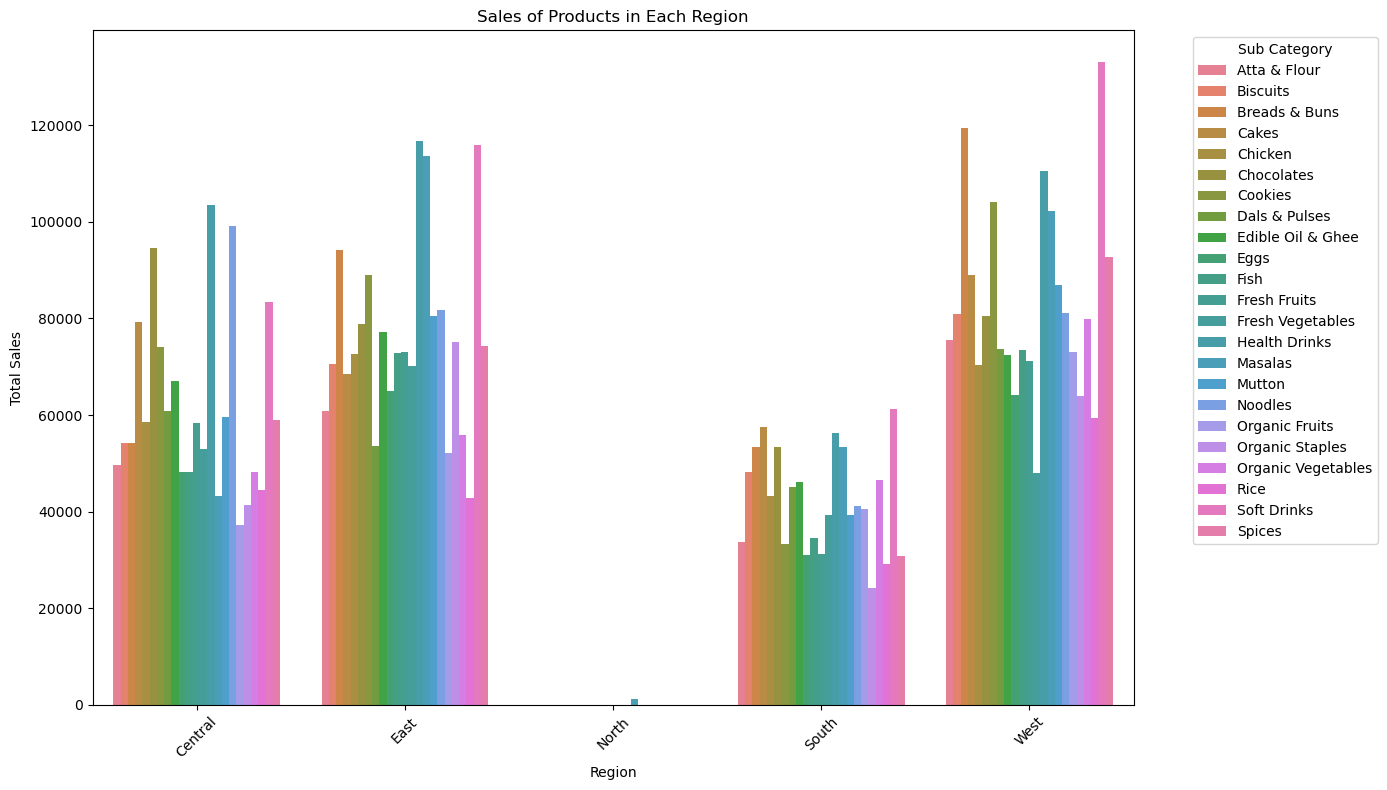

In [91]:
#Grouped Bar Chart for Sales in Each Region
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Sales', hue='Sub Category', data=region_product_sales, ci=None)
plt.title("Sales of Products in Each Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Sub Category")
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10884\658312347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=customers_region, palette="rocket")


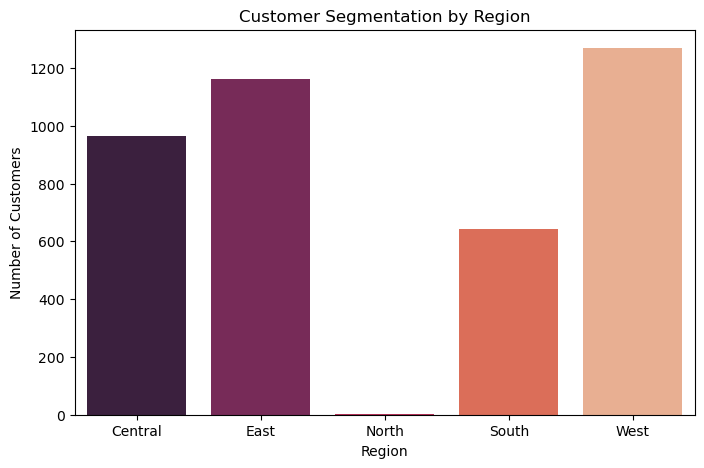

In [92]:
# Customers by region
customers_region = data.groupby('Region')['Sales'].count().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Sales', data=customers_region, palette="rocket")
plt.title("Customer Segmentation by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


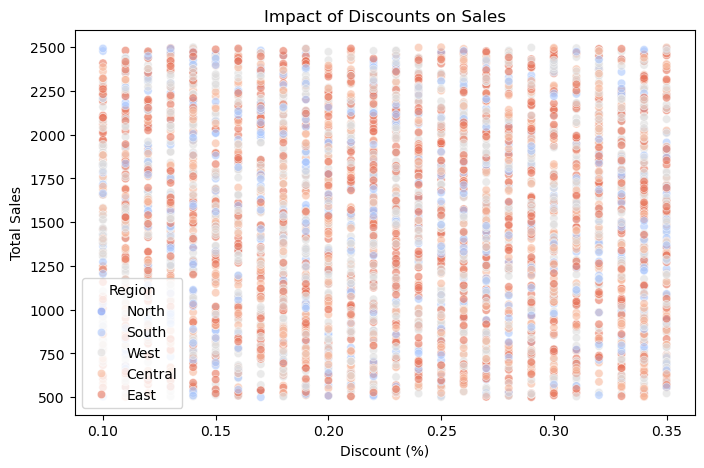

In [93]:
# Discounts vs Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount', y='Sales', data=data, hue='Region', palette="coolwarm", alpha=0.6)
plt.title("Impact of Discounts on Sales")
plt.xlabel("Discount (%)")
plt.ylabel("Total Sales")
plt.show()


In [94]:
# Convert 'Order Date' to datetime and extract features
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day

# Drop the original 'Order Date' column
data.drop('Order Date', axis=1, inplace=True)

# Ensure all features are numeric or properly encoded
categorical_columns = data.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print(f"Categorical columns detected: {categorical_columns}")

    # Apply one-hot encoding to categorical columns
    data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check for any non-numerical columns after preprocessing
print("Data Types After Encoding:")
print(data_encoded.dtypes)


Categorical columns detected: Index(['Category', 'Sub Category', 'City', 'Region', 'State', 'Year-Month',
       'Day Name'],
      dtype='object')
Data Types After Encoding:
Sales                   int64
Discount              float64
Profit                float64
Year                    int32
Month                   int32
                       ...   
Day Name_Saturday        bool
Day Name_Sunday          bool
Day Name_Thursday        bool
Day Name_Tuesday         bool
Day Name_Wednesday       bool
Length: 116, dtype: object


C:\Users\Admin\AppData\Local\Temp\ipykernel_10884\854465663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_profit, palette="coolwarm")


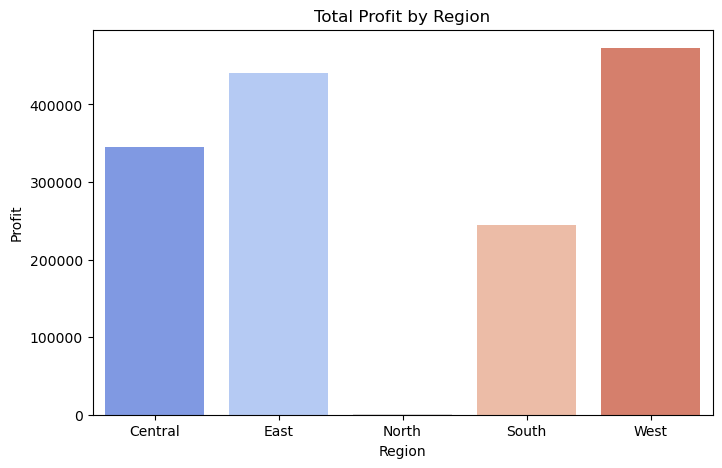

In [95]:
# Profit by region
region_profit = data.groupby('Region')['Profit'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Profit', data=region_profit, palette="coolwarm")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()


## 4. Train - Test Split ##

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Ensure datetime columns are properly converted to numerical features
if 'Date' in data_encoded.columns:
    data_encoded['Year'] = data_encoded['Date'].dt.year
    data_encoded['Month'] = data_encoded['Date'].dt.month
    data_encoded['Day'] = data_encoded['Date'].dt.day
    data_encoded.drop(['Date'], axis=1, inplace=True)  

# Define features and target
X = data_encoded.drop(['Sales'], axis=1)  
y = data_encoded['Sales']  

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [97]:
# Check for any non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns
if len(non_numeric_columns) > 0:
    print(f"Non-numeric columns detected: {non_numeric_columns}")
else:
    print("All columns are numeric. Ready for model training.")


Non-numeric columns detected: Index(['Year', 'Month', 'Day', 'Week', 'Category_Beverages',
       'Category_Eggs, Meat & Fish', 'Category_Food Grains',
       'Category_Fruits & Veggies', 'Category_Oil & Masala', 'Category_Snacks',
       ...
       'Year-Month_2018-6', 'Year-Month_2018-7', 'Year-Month_2018-8',
       'Year-Month_2018-9', 'Day Name_Monday', 'Day Name_Saturday',
       'Day Name_Sunday', 'Day Name_Thursday', 'Day Name_Tuesday',
       'Day Name_Wednesday'],
      dtype='object', length=112)


## 5. Train the Model ##

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## 6. Evaluate the Model ##

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 388.07891223733
Mean Squared Error: 223727.76051223735
R² Score: 0.331207009104872


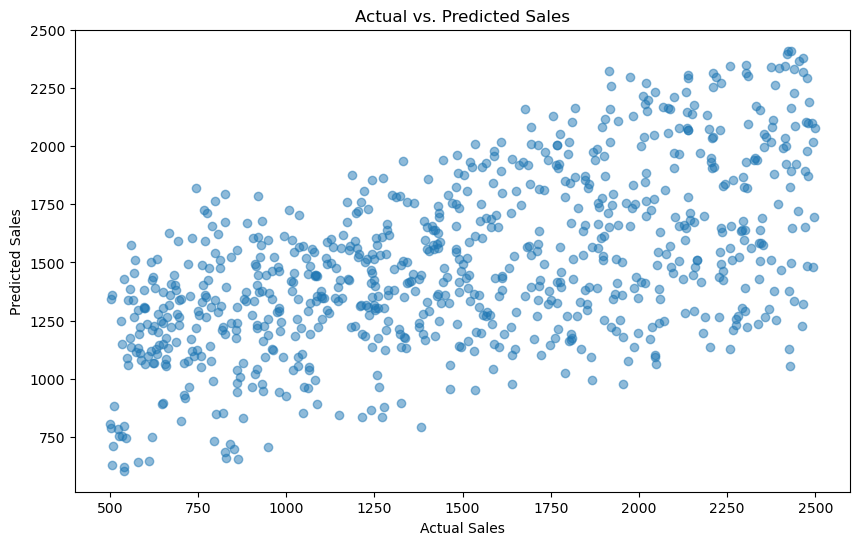

In [100]:
# Visualize actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

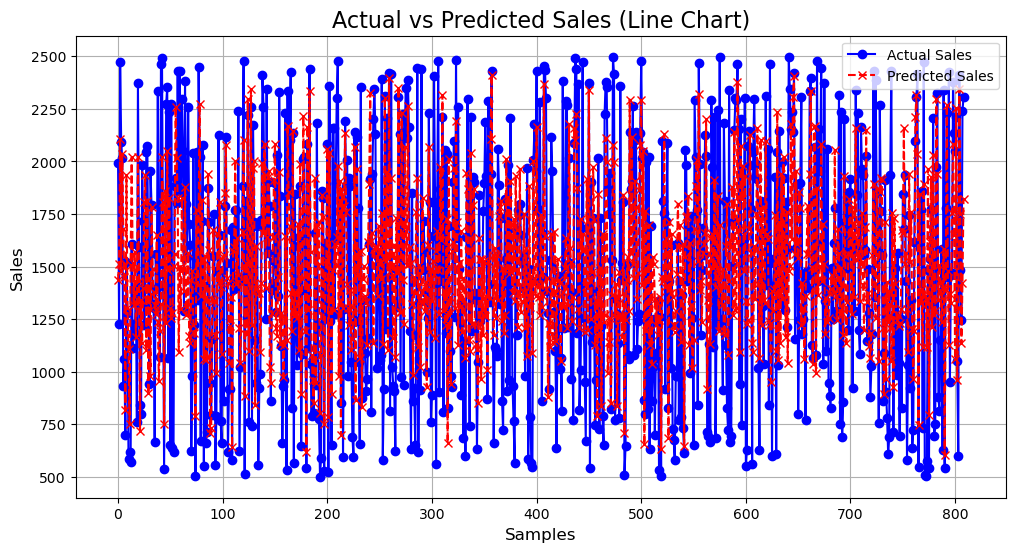

In [101]:
#Actual and Predicted Sales
import numpy as np
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Sales', color='blue', marker='o')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Sales', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Sales (Line Chart)', fontsize=16)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## 7. Optimize the Model ##

In [30]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Update the model with best parameters
rf_model_optimized = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


## 8. Validate the Model ##

In [31]:
# Predict and validate on the test set using the optimized model
y_pred_optimized = rf_model_optimized.predict(X_test)

# Evaluate performance
mae_opt = mean_absolute_error(y_test, y_pred_optimized)
mse_opt = mean_squared_error(y_test, y_pred_optimized)
r2_opt = r2_score(y_test, y_pred_optimized)

print(f"Optimized Mean Absolute Error: {mae_opt}")
print(f"Optimized Mean Squared Error: {mse_opt}")
print(f"Optimized R² Score: {r2_opt}")


Optimized Mean Absolute Error: 381.5039974515364
Optimized Mean Squared Error: 214063.4859768464
Optimized R² Score: 0.36009658032552616


## 9. Future Sales Insights ##

In [102]:
# Create a 'Date' column from 'Year', 'Month', and 'Day'
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Sort data by date
data = data.sort_values('Date')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Check the processed data
print(data.head())


                     Category   Sub Category         City   Region  Sales  \
Date                                                                        
2015-01-03             Bakery  Breads & Buns        Salem  Central    864   
2015-01-04             Snacks     Chocolates   Dharmapuri  Central    759   
2015-01-04          Beverages  Health Drinks       Trichy  Central    698   
2015-01-04             Bakery          Cakes    Nagercoil  Central   2033   
2015-01-05  Eggs, Meat & Fish           Fish  Tirunelveli     East    878   

            Discount  Profit       State  Year  Month  Day Year-Month  Week  \
Date                                                                          
2015-01-03      0.26  380.16  Tamil Nadu  2015      1    3     2015-1     1   
2015-01-04      0.27  174.57  Tamil Nadu  2015      1    4     2015-1     1   
2015-01-04      0.32  223.36  Tamil Nadu  2015      1    4     2015-1     1   
2015-01-04      0.15  325.28  Tamil Nadu  2015      1    4     20

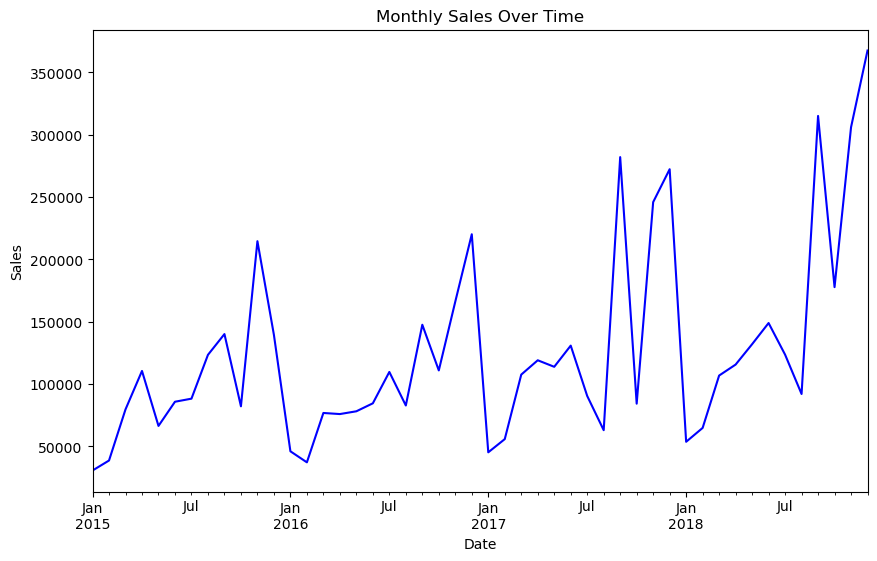

In [103]:
# Aggregate sales data monthly
monthly_sales = data['Sales'].resample('M').sum()

# Visualize the aggregated sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(title="Monthly Sales Over Time", color='blue')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [104]:
#pip install prophet


18:19:04 - cmdstanpy - INFO - Chain [1] start processing
18:19:05 - cmdstanpy - INFO - Chain [1] done processing


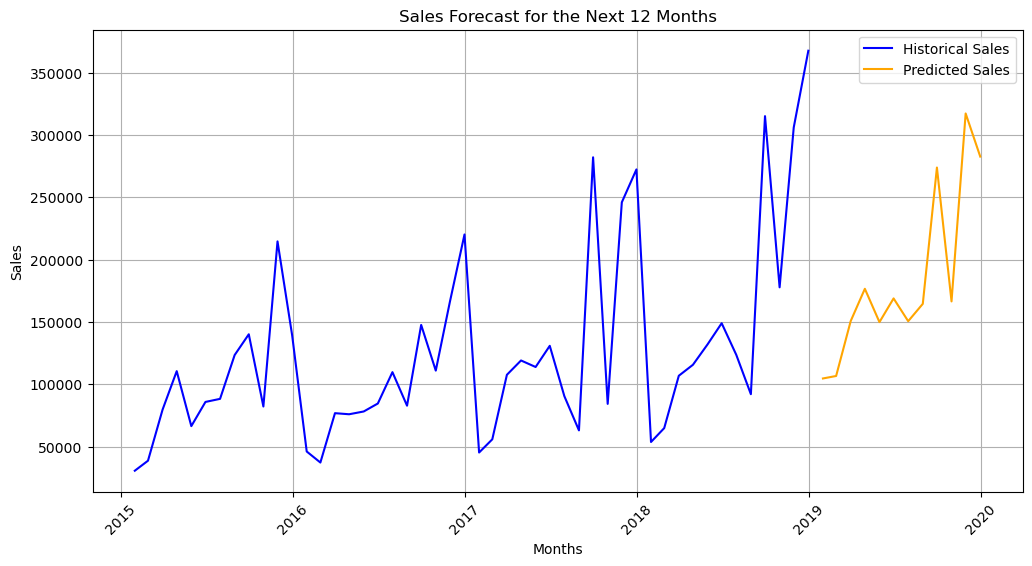

In [107]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = monthly_sales.reset_index()
prophet_data.columns = ['ds', 'y']  

model = Prophet()
model.fit(prophet_data)

# Prediction for Next 12 months
future_dates = model.make_future_dataframe(periods=12, freq='M')  # Next 12 months
forecast = model.predict(future_dates)

future_forecast = forecast[forecast['ds'] > monthly_sales.index[-1]]

plt.figure(figsize=(12, 6))

# Plot historical sales
plt.plot(monthly_sales.index, monthly_sales.values, label="Historical Sales", color='blue')

# Plot predicted sales
plt.plot(future_forecast['ds'], future_forecast['yhat'], label="Predicted Sales", color='orange')

plt.title("Sales Forecast for the Next 12 Months")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show

## Conclusion

### Key Insights

Data Analysis: Provided valuable insights into sales trends and correlations.

Model Performance: Achieved satisfactory accuracy with a Random Forest model.

Optimization: Hyperparameter tuning further enhanced model performance.

### Next Steps

Integrate the model into a live system.

Continuously monitor and retrain the model with new data.